# Value Iteration : GridWorld



## 1. Import Modules

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.collections as coll

## 2. **GridWorld and Cell Class**





In [10]:
class GridWorld:


  def __init__(self,w,h):
    '''
    width= number of cells in horizontal direction
    height= number of cells in vertical direction
    gamma= discount rate for the value iteration
    grid= dictionary of cells each with x and y coordinate   
    '''
    self.width=w
    self.height=h
    self.gamma=0.9
    self.grid={} 
    x_coords=list(range(w))
    y_coords=list(range(h))
    '''
    initialize cells in grid with active state and reward zero
    '''
    for cell_coord in itertools.product(x_coords,y_coords):
      self.grid[cell_coord]=Cell(cell_coord[0],cell_coord[1],celltype='active',reward=0)
    
  
  def makeConnections(self):
    '''
    used to link each cell to their neighboring cells through the legal directions: Up, Left, Right, or Down
    '''
    for cells in self.grid.keys():
      if self.grid[cells].celltype=='active':
        x=cells[0]
        y=cells[1]
        if x+1<self.width:#right
          if self.grid[(x+1,y)].celltype in ['active','dest']:
            self.grid[(x,y)].action_dict['Right']=self.grid[(x+1,y)]
        if x>0:#left
          if self.grid[(x-1,y)].celltype in ['active','dest']:
            self.grid[(x,y)].action_dict['Left']=self.grid[(x-1,y)]
        if y+1<self.height:#down
          if self.grid[(x,y+1)].celltype in ['active','dest']:
            self.grid[(x,y)].action_dict['Down']=self.grid[(x,y+1)]
        if y>0:#up
          if self.grid[(x,y-1)].celltype in ['active','dest']:
            self.grid[(x,y)].action_dict['Up']=self.grid[(x,y-1)]

  def setGridRewards(self,grid_reward_dict):
    '''
    set the reward for each cell in grid takes grid_reward_dict as input
    '''
    for key,item in grid_reward_dict.items():
      self.grid[key].reward=item
      self.grid[key].celltype='dest'
  
  def setObstacles(self,grid_celltype_list):
    '''
    set the obstacle cells in the grid with grid_celltype_list as input
    '''
    for cells in grid_celltype_list:
      self.grid[cells].celltype='obstacle'

  def plotGrid(self):
    '''
    plots the grid along with its cells with the available actions in each cell
    '''
    cell_width= 0.9
    cell_height = 0.9
    nrows = self.height
    ncols = self.width
    inbetween = 0.05
    xx = np.arange(inbetween, ncols, (cell_width+2*inbetween))
    yy = np.arange(nrows-1+inbetween, -inbetween, -(cell_height+2*inbetween))
    arrow_dict={'U':[0,cell_height/2],'D':[0,-cell_height/2],'R':[cell_width/2,0],'L':[-cell_width/2,0]}
    fig = plt.figure()
    ax = plt.subplot(111, aspect='equal')
    ax.axis([0,ncols,0,nrows])
    pat = []
    for xi,x in zip(xx,range(self.width)):
        for yi,y in zip(yy,range(self.height)):
          center_x=xi+cell_width/2
          center_y=yi+cell_height/2
          if self.grid[(x,y)].celltype in ['active']:
            sq = patches.Rectangle((xi, yi), cell_width, cell_height,fill=True,color='lightgrey')
            ax.add_patch(sq)
            for direction,dx_dy in arrow_dict.items():
              dx=dx_dy[0]
              dy=dx_dy[1]
              arr=patches.Arrow(center_x,center_y,dx,dy,color='darkgrey',width=0.4)
              ax.add_patch(arr) 
          elif self.grid[(x,y)].celltype in ['dest']:
            sq = patches.Rectangle((xi, yi), cell_width, cell_height,fill=True,color='yellowgreen')
            ax.add_patch(sq)

            ax.text(center_x,center_y,s=str(self.grid[(x,y)].reward),size='large',weight='bold')
          else:
            sq = patches.Rectangle((xi, yi), cell_width, cell_height,fill=True,color='black')
            ax.add_patch(sq)
    ax.set_xticks(np.arange(0.5,ncols,1))
    ax.set_xticklabels(np.arange(ncols))
    ax.set_yticks(np.arange(0.5,nrows,1))
    ax.set_yticklabels(np.arange(nrows-1,-1,-1))


  def valueIteration(self,trials=50,plotProgress=False):
    '''
    Performs value iteration algorithm to determine the best path to the destination
    '''   
    for i in range(trials):
      for y in range(self.height):
        for x in range(self.width):
          if self.grid[(x,y)].celltype =='active':
            v_dict={k:self.gamma*v.V_now+v.reward for k,v in self.grid[(x,y)].action_dict.items()}
            max_action=max(v_dict,key=v_dict.get)
            self.grid[(x,y)].best_action=max_action
            self.grid[(x,y)].V_next=v_dict[max_action]
            #self.grid[(x,y)].V_now=self.grid[(x,y)].V_next
    
      for y in range(self.height):
        for x in range(self.width):
          if self.grid[(x,y)].celltype =='active':
            self.grid[(x,y)].V_now=self.grid[(x,y)].V_next
      if plotProgress:
        self.plotGridActions(title=str(i))

  def plotGridActions(self,title=None):
    '''
    plots the best action that can be taken from each cell in the grid to reach the destination.
    '''

    cell_width= 0.9
    cell_height = 0.9
    nrows = self.height
    ncols = self.width
    inbetween = 0.05
    xx = np.arange(inbetween, ncols, (cell_width+2*inbetween))
    yy = np.arange(nrows-1+inbetween, -inbetween, -(cell_height+2*inbetween))
    arrow_dict={'U':[0,cell_height/2],'D':[0,-cell_height/2],'R':[cell_width/2,0],'L':[-cell_width/2,0]}
    fig = plt.figure()
    ax = plt.subplot(111, aspect='equal')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax.axis([0,ncols,0,nrows])
    pat = []
    for xi,x in zip(xx,range(self.width)):
        for yi,y in zip(yy,range(self.height)):
          center_x=xi+cell_width/2
          center_y=yi+cell_height/2
          if self.grid[(x,y)].celltype in ['active']:
            value_text=str(round(self.grid[(x,y)].V_now,2))
            ax.text(center_x,center_y,s=value_text,size='x-large')           
            sq = patches.Rectangle((xi, yi), cell_width, cell_height,fill=True,color='lightgrey')
            ax.add_patch(sq)
            for direction,dx_dy in arrow_dict.items():
              dx=dx_dy[0]
              dy=dx_dy[1]
              arr=patches.Arrow(center_x,center_y,dx,dy,color='darkgrey',width=0.4)
              ax.add_patch(arr) 
            if self.grid[(x,y)].best_action!=None:
              best_dir=arrow_dict[self.grid[(x,y)].best_action[0]]
              dx=best_dir[0]
              dy=best_dir[1]
              arr=patches.Arrow(center_x,center_y,dx,dy,color='green',width=0.6)
              ax.add_patch(arr)
          elif self.grid[(x,y)].celltype in ['dest']:
            sq = patches.Rectangle((xi, yi), cell_width, cell_height,fill=True,color='yellowgreen')
            ax.add_patch(sq)
            ax.text(center_x,center_y,s=str(self.grid[(x,y)].reward),size='x-large',weight='bold')
          else:
            sq = patches.Rectangle((xi, yi), cell_width, cell_height,fill=True,color='black')
            ax.add_patch(sq)
    ax.set_xticks(np.arange(0.5,ncols,1))
    ax.set_xticklabels(np.arange(ncols))
    ax.set_yticks(np.arange(0.5,nrows,1))
    ax.set_yticklabels(np.arange(nrows-1,-1,-1))
    if title:
      fig.suptitle('trial:'+title)
    return ax

In [11]:
class Cell(GridWorld):
  def __init__(self,x_coord,y_coord,celltype='active',reward=0):
    '''
    each cell has the attributes: x,y coordinates; celltype: 'active','dest', or 'obstacle';
    reward obtained on being in the cell; Value functions V_now and V_next; 
    best_action: that can be taken in the cell; action_dict: all available actions along with the value function

    '''
    self.x_coord=x_coord
    self.y_coord=y_coord
    self.celltype=celltype
    self.reward=0
    self.V_now=0
    self.V_next=0
    self.best_action=None
    self.action_dict={}


## 3. **GridWorld Setup**

GridWorld arena has a dimension of (w,h) where w is number of cells in horizontal direction and h is the number of cells in vertical direction. The cells are indexed by the tuple (x,y) their x-coordinate and y-coordinate starting from 0. 

setGridRewards() method is used to assign rewards to the destination cells.
setObstacles() method is used to set a list of cells referred by their coordinates in tuple format.
makeConnections() initializes the grid.

Steps to initialize a gridworld arena:


1.   Create GridWorld object with dimensions (h,w) as input parameters.
2.   Call setGridRewards() method for the object which takes a dictionary with cell coordinate tuples as keys and reward as values. This assigns the reward to the given cells. Higher the reward, more preferrable the cell is as a destination.
3.   Call setObstacles() method which takes in a list of cell coordinate tuples - this assigns the list of cells as obstacles. 
4. Call makeConnections() method which will build the grid. 

All active cells are initialized with value function of value 0.

In [4]:
gw1=GridWorld(5,5) # dimensions of the grid : width and height

grid_reward_dict={(4,0):1,(4,1):-1} # Cell with coordinates (4,0) has a reward of 1 and (4,1) has a reward of -1. (4,0) is the desired destination
gw1.setGridRewards(grid_reward_dict)

gw1.setObstacles([(1,1),(2,1),(4,2),(4,3)]) # Obstacles

gw1.makeConnections()

You can visualize the gridworld arena by calling the plotGrid() method. The source is assumed to be the bottom leftmost cell. 



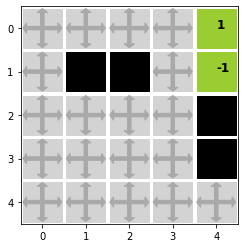

In [6]:
gw1.plotGrid()

## Value Iteration

Each state corresponds to each of the gridworld cells. The set of actions are the set of directions an agent can move in each of the cells. The objective of this simulation is to find the path to the destination cell with the maximum reward. This is achieved in this example through value iteration.

The value function 𝑉(𝑠) provides the expected discounted value of being in each state 𝑠. 

$V(s)=\max_a [R(s,a)+\gamma V(s')] $ 

where $a$ is any action that can be taken from state $s$ and $s'$ is the state that action $a$ taken from $s$ leads to.
$\gamma$ is the discount rate (in this example, this value is set as 0.9)




This equation is solved in the cell below using the valueIteration() function and the best actions at each iteration is plotted using the plotProgess=True option. 

The green arrows chart the best path to the destination cells that maximizes the reward.

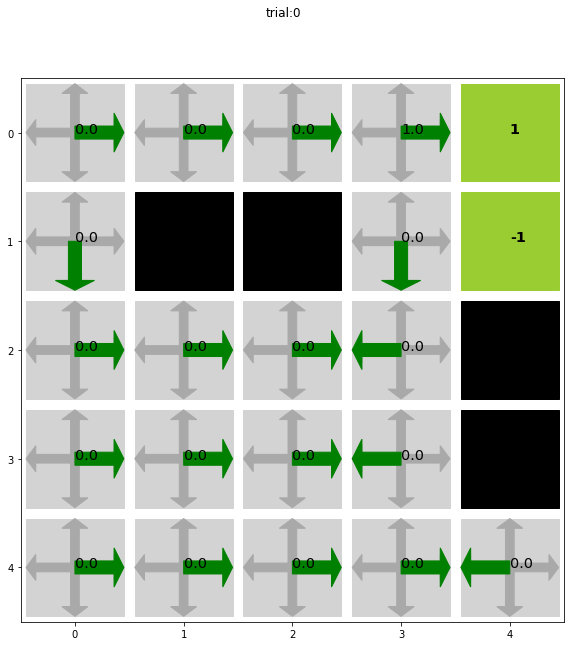

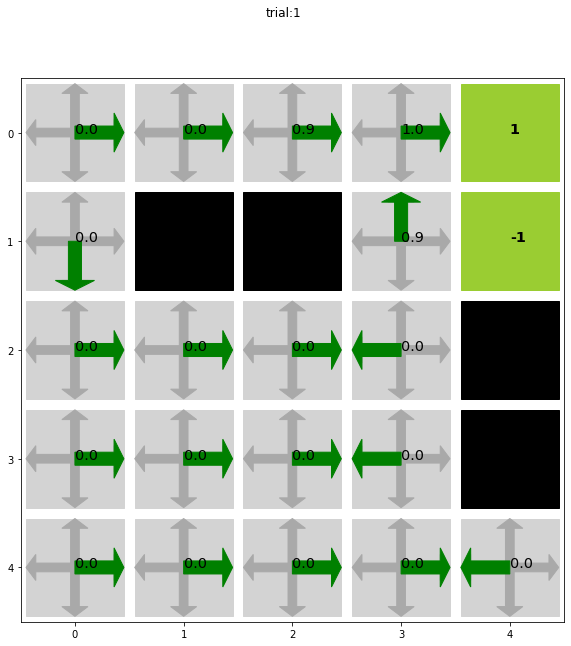

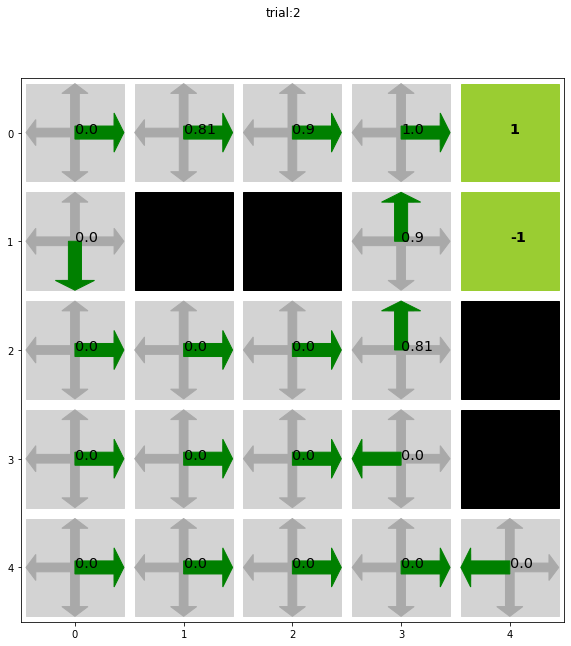

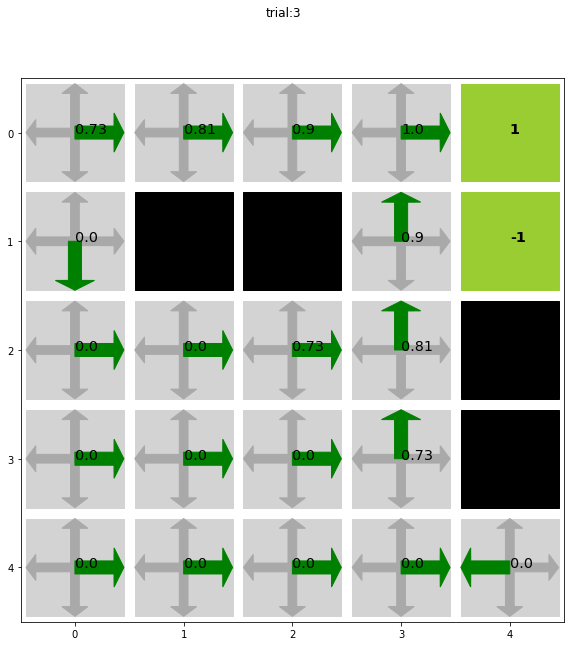

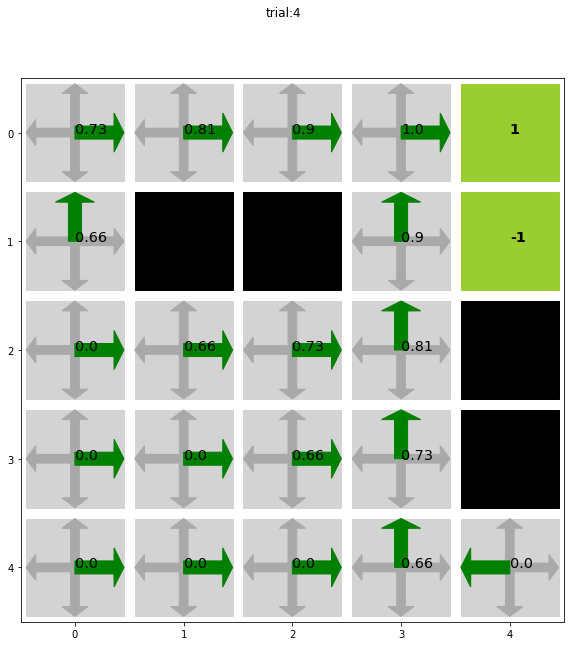

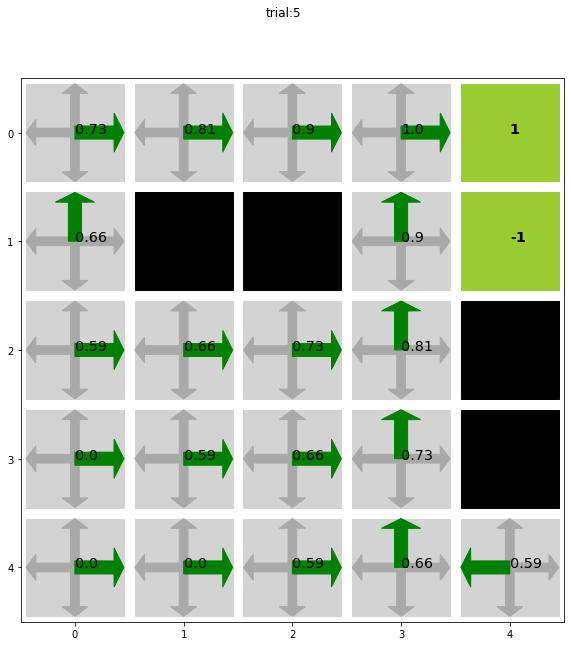

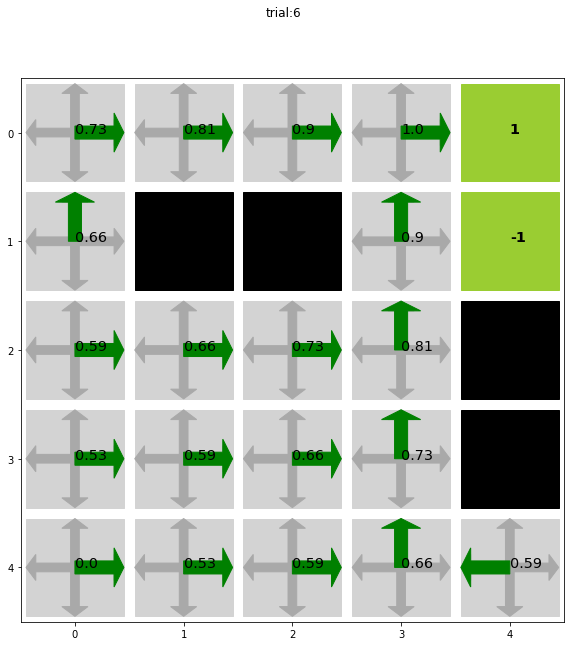

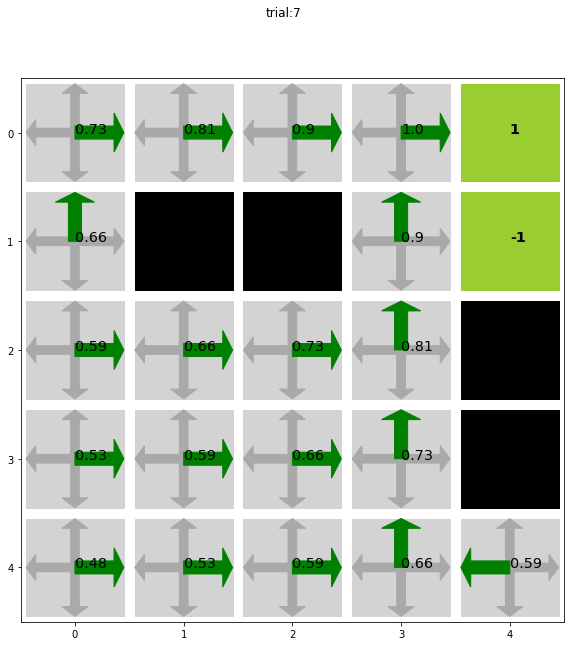

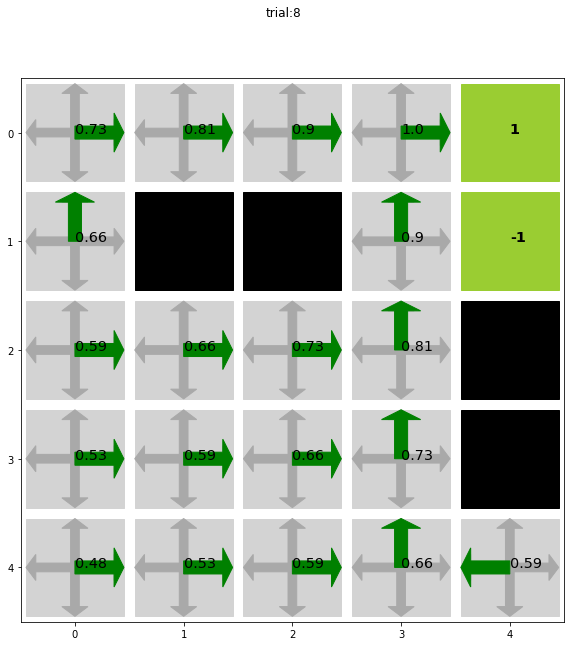

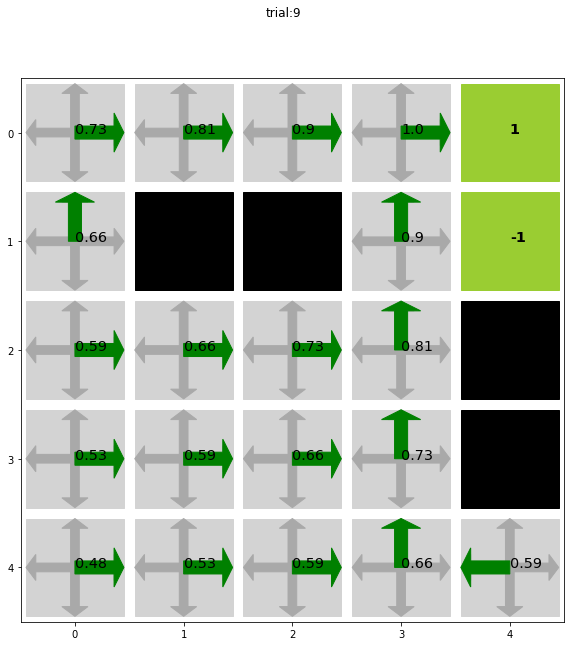

In [7]:
trials=10
gw1.valueIteration(trials,plotProgress=True)